#### Import necessary modules

In [1]:
from msa import Structure, Element, Node, Material, Section
import numpy as np

 #### Initialize structural model

In [2]:
struct = Structure()

#### Define material properties

In [3]:
mat= Material(
        id=1,
        E=1000,    
        nu=0.3,
    )
struct.add_material(mat) # add material to structure

#### Define cross-section properties

In [4]:
section = Section(
        id=1,
        A=np.pi,   
        Iy=np.pi/4,
        Iz=np.pi/4, 
        Ir=np.pi/2,
        J=np.pi/2,
    )
struct.add_section(section)

#### Create nodes

In [5]:
# Node 1: Fixed support
node1 = Node(id=1, x=0, y=0, z=0)
node1.fixed_dofs = [True]*6 
struct.add_node(node1)
    
# Node 2: Free node
node2 = Node(id=2, x=30, y=40, z=0)
node2.loads = [-3/5,-4/5,0,0,0,0] 
struct.add_node(node2)

#### Create elements

In [6]:
beam_element1= Element(
        id=1,
        node1=struct.nodes[1],
        node2=struct.nodes[2],
        material=mat,
        section=section,
    )
struct.add_element(beam_element1)

#### Perform linear analysis

In [7]:
struct.linear_analyze()

#### Compte elastic critical stress

In [8]:
lambda_cr, buckling_mode = struct.compute_elastic_critical_load()
print(f'The celastic ritical load of the sturcture is {lambda_cr} and the buckling shape is:')
print(f'{buckling_mode}')

The celastic ritical load of the sturcture is 0.7809879011060958 and the buckling shape is:
[ 0.          0.          0.          0.          0.          0.
 -0.          0.         -1.         -0.02508423  0.01881317  0.        ]


#### Plot the initial and deformed shape

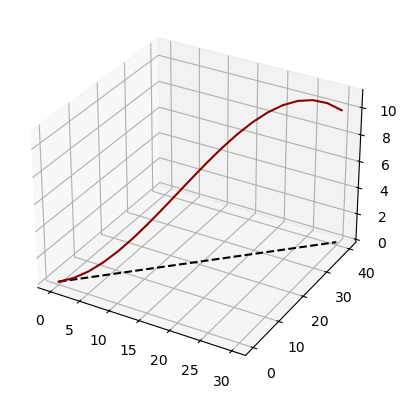

In [9]:
struct.post_processing()